In [1]:
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2)
clf = LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\Milkshake\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\Milkshake\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8524590163934426

In [8]:
y_preds = clf.predict(X_test)

In [11]:
np.mean(y_preds == y_test)

0.8524590163934426

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [13]:
clf.predict_proba(X_test[:5])

array([[0.9, 0.1],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.9, 0.1],
       [0.1, 0.9]])

In [14]:
clf.predict(X_test[:5])

array([0, 0, 1, 0, 1], dtype=int64)

In [16]:
clf.score(X_train,y_train)


1.0

In [17]:
clf.score(X_test,y_test)

0.8524590163934426

In [20]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf, X, y, cv =5))

0.8083060109289617

In [21]:
from sklearn.metrics import roc_curve
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.9, 0.1],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.9, 0.1],
       [0.1, 0.9],
       [0.3, 0.7],
       [0.2, 0.8],
       [1. , 0. ],
       [0.9, 0.1],
       [0.3, 0.7]])

In [22]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.1, 0.5, 0.6, 0.1, 0.9, 0.7, 0.8, 0. , 0.1, 0.7])

In [23]:
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

In [25]:
fpr

array([0.        , 0.        , 0.        , 0.06896552, 0.06896552,
       0.10344828, 0.17241379, 0.17241379, 0.20689655, 0.34482759,
       0.62068966, 1.        ])

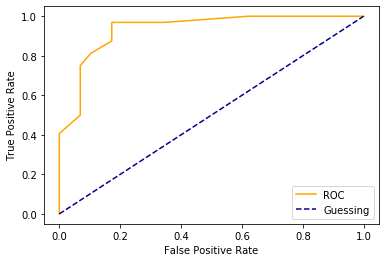

In [28]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title=("ROC Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9342672413793104

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_preds)

array([[26,  3],
       [ 6, 26]], dtype=int64)

In [33]:
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,26,3
1,6,26


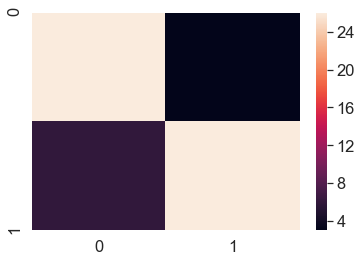

In [37]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat)

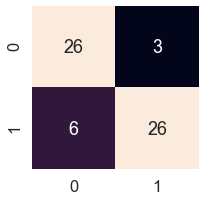

In [40]:
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,annot=True,cbar=False)
    plt.xlabel="True label"
    plt.ylabel="Predicted label"
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top-0.5)
plot_conf_mat(conf_mat)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [3]:
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.83606557, 0.91803279, 0.78688525, 0.78333333, 0.78333333])

In [8]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                  "precision": round(precision,2),
                  "recall": round(recall,2),
                  "f1": round(f1,2)}
    return metric_dict

In [10]:
np.random.seed(42)
heart_disease = heart_disease.sample(frac=1)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
train_split = round(0.7*len(heart_disease))
valid_split = round(train_split + 0.15 * len(heart_disease))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[train_split:], y[train_split:]
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_valid)
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

{'accuracy': 0.76, 'precision': 0.73, 'recall': 0.83, 'f1': 0.78}

In [11]:
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=100)
clf_2.fit(X_train,y_train)
y_preds_2 = clf_2.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)
clf_2_metrics

{'accuracy': 0.82, 'precision': 0.78, 'recall': 0.91, 'f1': 0.84}

In [12]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2,4,6],
       "min_samples_leaf":[1,2,4]}
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,cv=5,verbose=2)
rs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=1000, min_samples_split=4, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=1, o

In [13]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [14]:
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test,rs_y_preds)
rs_metrics

{'accuracy': 0.8, 'precision': 0.8, 'recall': 0.89, 'f1': 0.85}

In [17]:
grid_2 = {"n_estimators":[100,200,500],
       "max_depth": [None],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [6],
       "min_samples_leaf":[1,2 ]}
from sklearn.model_selection import GridSearchCV

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)
gs_clf = GridSearchCV(estimator=clf,param_grid=grid_2,cv=5,verbose=2)
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   11.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [18]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [20]:
gs_y_preds = gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test, gs_y_preds)

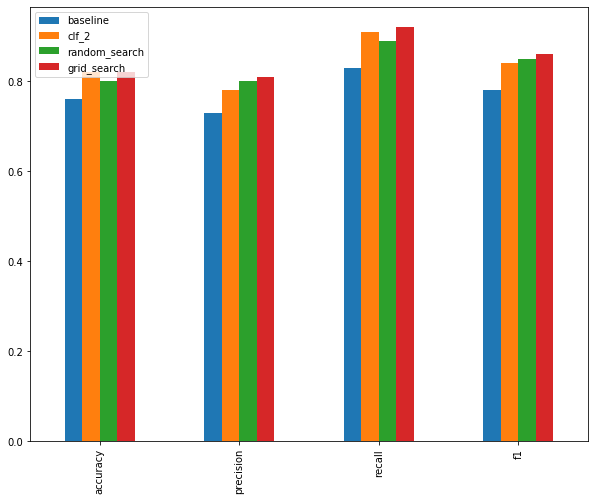

In [22]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, "clf_2": clf_2_metrics,"random_search": rs_metrics, "grid_search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

In [23]:
import pickle
pickle.dump(gs_clf, open("gs_random_forest_model_1.pk1", "wb"))

In [24]:
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pk1", "rb"))
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.92, 'f1': 0.86}

In [27]:
from joblib import dump, load
dump(gs_clf, filename="./data/gs_random_forest_model_1.joblib")


['./data/gs_random_forest_model_1.joblib']

In [34]:
loaded_joblib_model = load(filename="./data/gs_random_forest_model_1.joblib")

In [35]:
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.92, 'f1': 0.86}